In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv(r"C:\Users\HP\Downloads\House (1).csv")
data.sample(5)

,Sr No,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
438,442,1423.200,3,7,3,2,2,68000
483,487,900.174,4,7,2,2,2,88000
26,27,3664.740,19,19,3,2,3,200000
632,636,1099.422,2,7,4,2,2,57777
398,402,1487.244,6,7,3,2,2,33700


In [3]:
del data['Sr No']

In [4]:
data.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [5]:
data.duplicated().sum()

66

In [6]:
data.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 35.4 KB


In [8]:
data.corr()['Price']

Sqft           0.825514
Floor          0.244553
TotalFloor     0.333631
Bedroom        0.467059
Living.Room    0.328788
Bathroom       0.605542
Price          1.000000
Name: Price, dtype: float64

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

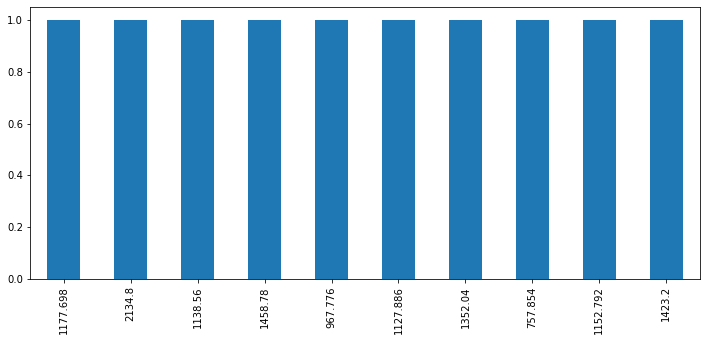

In [10]:
data['Sqft'].head(10).value_counts().plot(kind='bar',figsize=(12,5))

<AxesSubplot:>

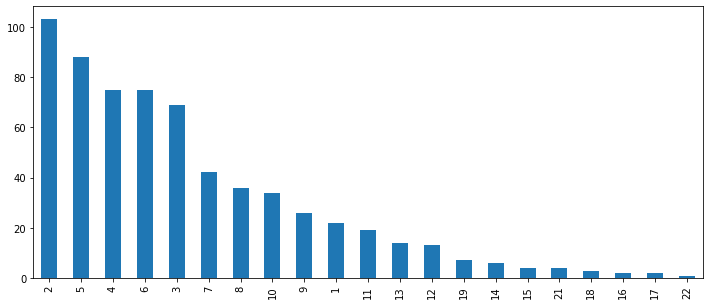

In [11]:
data['Floor'].value_counts().plot(kind='bar',figsize=(12,5))

<AxesSubplot:>

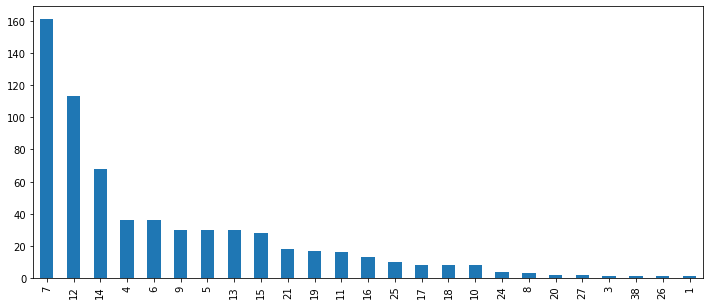

In [12]:
data['TotalFloor'].value_counts().plot(kind='bar',figsize=(12,5))

<AxesSubplot:>

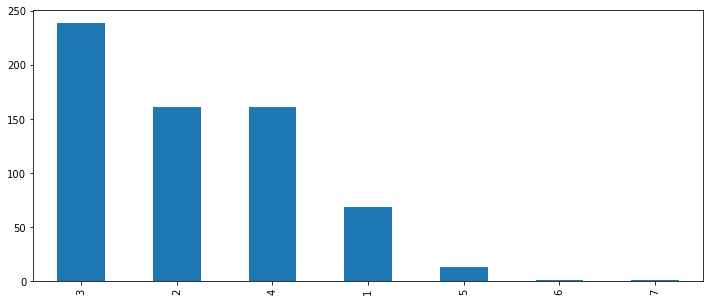

In [13]:
data['Bedroom'].value_counts().plot(kind='bar',figsize=(12,5))

<AxesSubplot:>

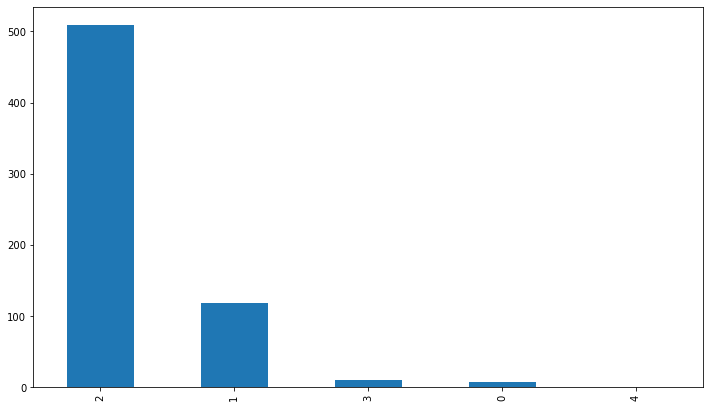

In [14]:
data['Living.Room'].value_counts().plot(kind='bar',figsize=(12,7))

<AxesSubplot:>

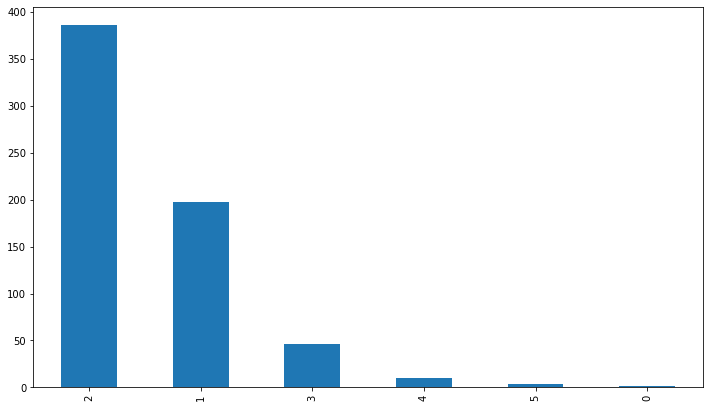

In [15]:
data['Bathroom'].value_counts().plot(kind='bar',figsize=(12,7))

In [16]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='Floor', ylabel='Price'>

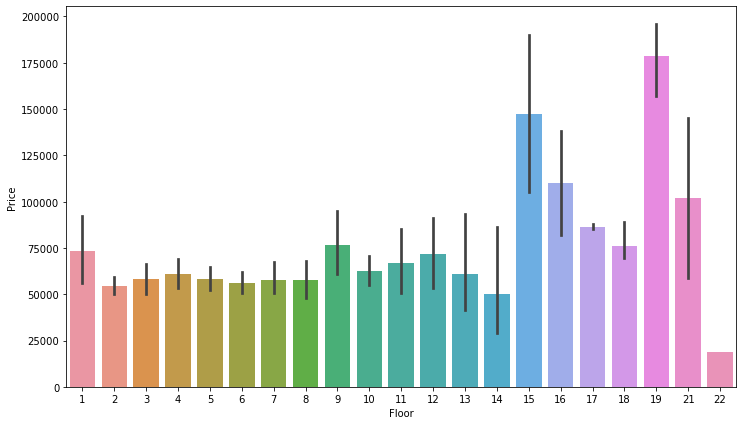

In [17]:
plt.figure(figsize=(12,7))
sns.barplot(data['Floor'],data['Price'])

<AxesSubplot:xlabel='Sqft', ylabel='Price'>

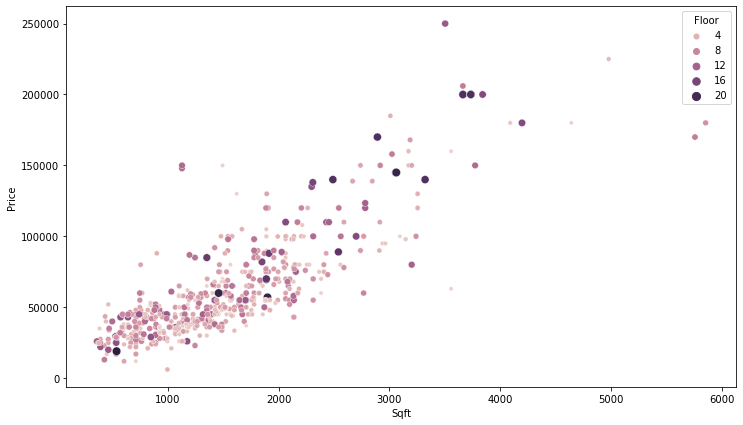

In [18]:
plt.figure(figsize=(12,7))
sns.scatterplot(data['Sqft'],data['Price'],hue=data['Floor'],size=data['Floor'])

<AxesSubplot:>

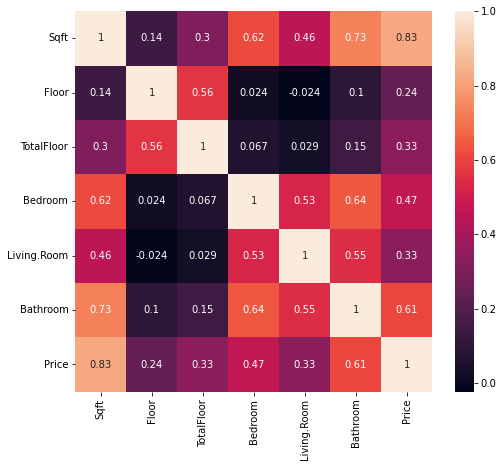

In [19]:
plt.figure(figsize=(8,7))
sns.heatmap(data.corr(),annot=True)

In [20]:
x=data.drop

In [21]:
col=data.columns
col

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom',
       'Price'],
      dtype='object')

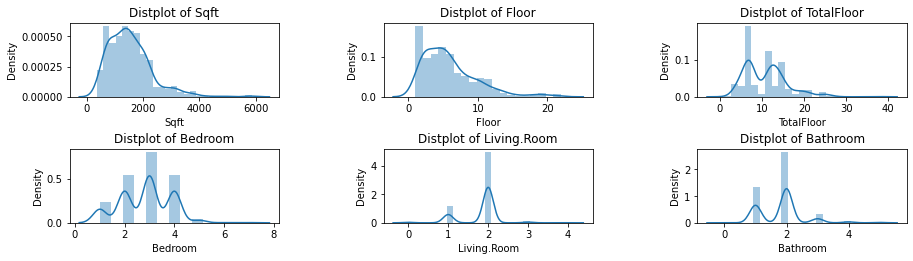

In [22]:
n=0
plt.figure(1,figsize=(15,6))
for x in ['Sqft','Floor','TotalFloor','Bedroom','Living.Room','Bathroom']:
    n+=1
    plt.subplot(3,3,n)
    plt.subplots_adjust(hspace=0.7, wspace=0.5)
    sns.distplot(data[x])
    plt.title('Distplot of {}'.format(x))
plt.show()    

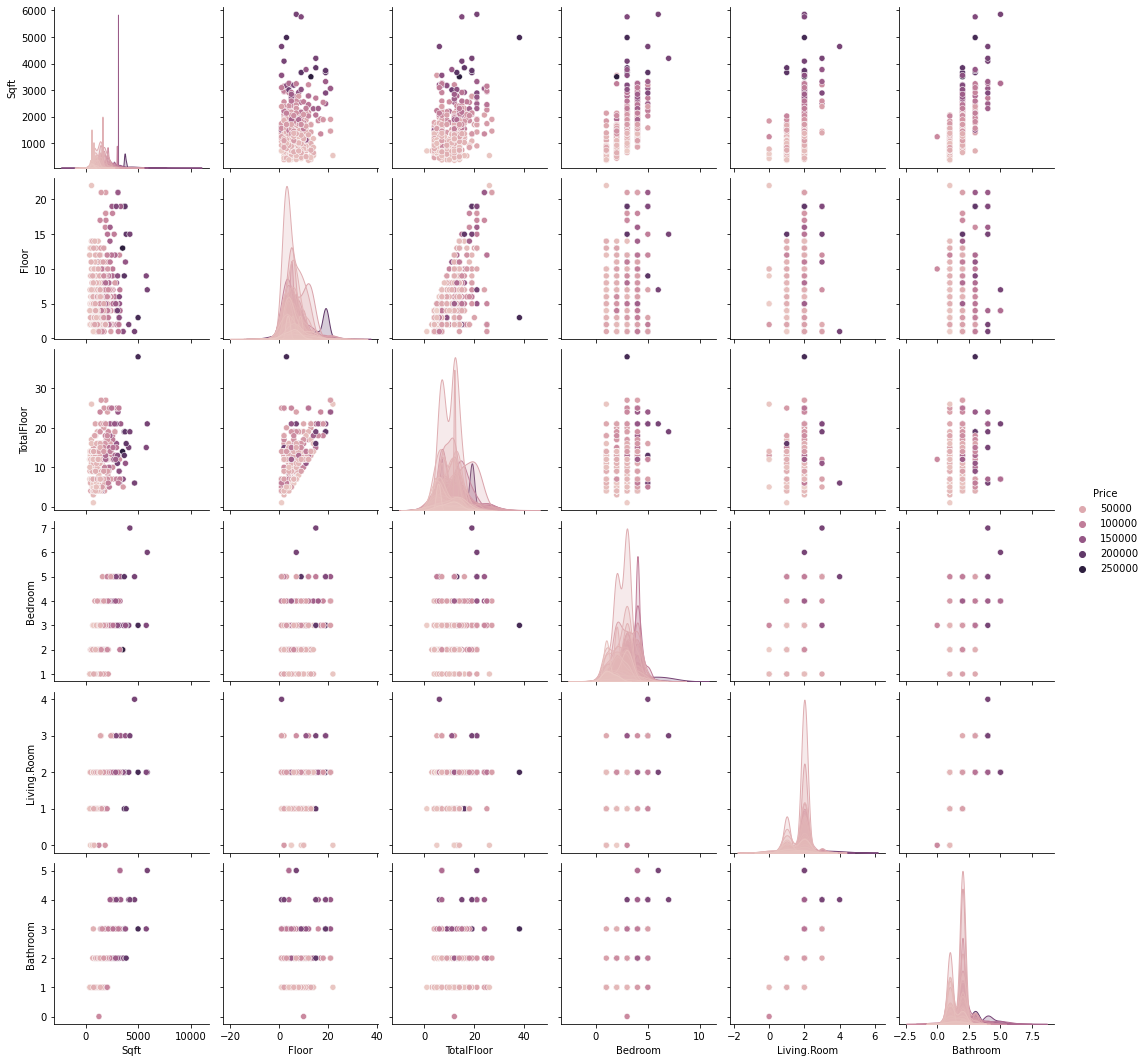

In [23]:
sns.pairplot(data,hue='Price')

<AxesSubplot:xlabel='Price', ylabel='Density'>

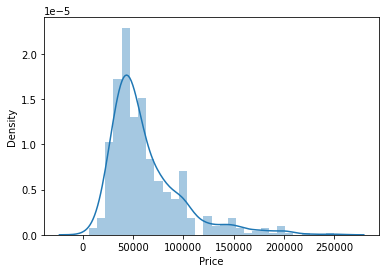

In [24]:
sns.distplot(data['Price'])

<AxesSubplot:xlabel='Price', ylabel='Density'>

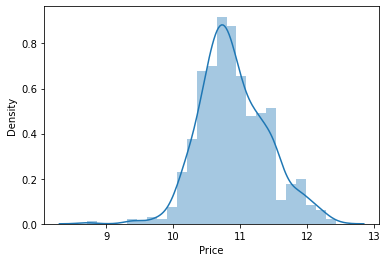

In [25]:
sns.distplot(np.log(data['Price']))

In [26]:
from scipy.stats import skew,kurtosis

In [27]:
skew(np.log(data['Price']))

0.24163075876919646

In [28]:
kurtosis(np.log(data['Price']),fisher=False)

3.5146944842595524

In [29]:
Y=np.log(data['Price'])
Y

0      11.034890
1      11.264464
2      10.968198
3      10.714418
4      10.714418
         ...    
640    10.714418
641    10.118599
642    10.714418
643    11.082143
644    10.491274
Name: Price, Length: 645, dtype: float64

In [30]:
x=data.drop(columns=['Price'])
y=data['Price']

In [31]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
s.fit_transform(x)

array([[-0.45639303, -1.01489712, -0.77234699, -0.82895634,  0.40269363,
         0.27691822],
       [ 0.79179777, -0.24204158, -0.77234699,  1.15132825,  0.40269363,
         0.27691822],
       [-0.50743429, -0.24204158, -0.77234699, -0.82895634,  0.40269363,
        -1.18711665],
       ...,
       [-1.02712711,  1.81890652,  0.62980285, -1.81909863, -1.76178464,
        -1.18711665],
       [ 0.23498403, -0.7572786 ,  0.62980285,  0.16118595,  0.40269363,
         0.27691822],
       [-0.19654662,  0.01557693, -0.77234699,  0.16118595,  0.40269363,
        -1.18711665]])

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,Y,random_state=1,test_size=0.2)

In [33]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(516, 6)
(129, 6)
(516,)
(129,)


In [34]:
from sklearn.metrics import confusion_matrix,r2_score,mean_absolute_error,mean_squared_error

In [35]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
tree=dt.fit(x_train,y_train)
y_tree=dt.predict(x_test)

In [36]:
print(r2_score(y_test,y_tree))

0.37014044815909175


In [37]:
mean_absolute_error(y_test,y_tree)

0.2588769677201395

In [38]:
mean_squared_error(y_test,y_tree)

0.15708599741603016

In [39]:
#KNR
from sklearn.neighbors import KNeighborsRegressor

In [40]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
k_pred=knr.predict(x_test)

In [41]:
print(r2_score(y_test,k_pred))

0.6020698222745853


In [42]:
print(np.sqrt(mean_squared_error(y_test,k_pred)))

0.31502884068154224


In [43]:
#plt.figure(figsize = (6,6))
#sns.swarmplot(x = 'features', y = 'value', hue = 'Species', data = data)
#plt.show()

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
grid_para={'n_neighbors':[5,7,9,11,13,15],'weights':['uniform','distance'],'metric':['minkowski','eucleidean','manhattan']}

In [46]:
gs=GridSearchCV(KNeighborsRegressor(),grid_para,verbose=1,cv=3,n_jobs=-1)

In [47]:
g_reg=gs.fit(x_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [48]:
g_reg.best_params_

{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}

In [49]:
knn=KNeighborsRegressor(n_neighbors=15,weights='distance',metric='manhattan')

In [50]:
knn.fit(x_train,y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=15, weights='distance')

In [51]:
y_knn=knn.predict(x_test)

In [52]:
print(r2_score(y_test,y_knn))

0.665003195962161


In [53]:
#RFR
from sklearn.ensemble import RandomForestRegressor

In [54]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
r_pred=rfr.predict(x_test)

In [55]:
print(r2_score(y_test,r_pred))

0.6670406309168906


In [56]:
print(np.sqrt(mean_squared_error(y_test,r_pred)))

0.28816583999316747
